In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import datasets
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
print('train shape is ',train.shape)
print('test shape is ',test.shape)

train shape is  (4209, 378)
test shape is  (4209, 377)


In [4]:
train.head(2)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0


In [5]:
test.head(2)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0


In [6]:
# drop column ID as it is not needed
train1=train.drop('ID',axis=1)
test1=test.drop('ID',axis=1)

In [7]:
print('shape of train1 is ',train1.shape)
print('shape of test1 is ',test1.shape)

shape of train1 is  (4209, 377)
shape of test1 is  (4209, 376)


## check for zero variance column and then drop them

In [8]:
zero_var_col=train1.var()[train1.var()==0].index.values
zero_var_col

array(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
       'X293', 'X297', 'X330', 'X347'], dtype=object)

In [9]:
train1=train1.drop(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
       'X293', 'X297', 'X330', 'X347'],axis=1)
test1=test1.drop(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
       'X293', 'X297', 'X330', 'X347'],axis=1)
print('shape of train1 is ',train1.shape)
print('shape of test1 is ',test1.shape)

shape of train1 is  (4209, 365)
shape of test1 is  (4209, 364)


zero columns of train1 and test1 datasets have null values

In [10]:
np.sum(train1.isnull().sum())

0

In [11]:
np.sum(test1.isnull().sum())

0

combine the datasets

In [12]:
combinedata=pd.concat([train1,test1],axis=0)
print('shape of combinedata is ',combinedata.shape)

shape of combinedata is  (8418, 365)


separating the columns of numeric and object datatypes

In [13]:
numericdata=combinedata.select_dtypes(include=np.number)
objectdata=combinedata.select_dtypes(include=np.object)
print('shape of numericdata is ',numericdata.shape)
print('shape of objectdata is ',objectdata.shape)

shape of numericdata is  (8418, 357)
shape of objectdata is  (8418, 8)


In [14]:
objectdata.head(2)

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o


apply label encoding on objectdata containing columns of object datatype 

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le=LabelEncoder()

In [17]:
objectdata=objectdata.apply(le.fit_transform)
objectdata.head(2)

,X0,X1,X2,X3,X4,X5,X6,X8
0,37,23,20,0,3,27,9,14
1,37,21,22,4,3,31,11,14


after label encoding again combine the data, now all the data is in numeric form and then split into train and test data

In [18]:
combinedatafinal=pd.concat([objectdata,numericdata],axis=1)

In [19]:
traindf=combinedatafinal[0:4209]
testdf=combinedatafinal[4209:8418]
print('shape of traindf is ',traindf.shape)
print('shape of testdf is ',testdf.shape)

shape of traindf is  (4209, 365)
shape of testdf is  (4209, 365)


As there are 365 columns in the dataset to reduce the time and storage space required and remove multicollinearity
do dimensionality reduction using PCA

In [20]:
from sklearn.decomposition import PCA

we see that with the traindf the first 15 components contain approximately 97% of the variance

Text(0, 0.5, 'cumulative explained variance')

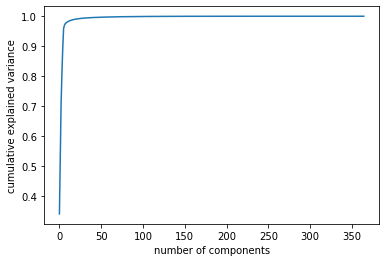

In [21]:
pca=PCA(random_state=420).fit(traindf)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

let's see the plot with 15 components

For 12 components we are getting arond 100% of the variance

Text(0, 0.5, 'cumulative explained variance')

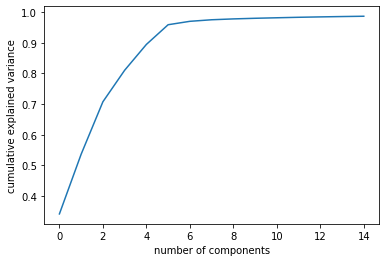

In [22]:
pca=PCA(n_components=15,random_state=420).fit(traindf)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [23]:
traindf.head(2)

,X0,X1,X2,X3,X4,X5,X6,X8,y,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,37,23,20,0,3,27,9,14,130.81,0,...,0,0,1,0,0,0,0,0,0,0
1,37,21,22,4,3,31,11,14,88.53,0,...,1,0,0,0,0,0,0,0,0,0


In [24]:
testdf.head(2)

,X0,X1,X2,X3,X4,X5,X6,X8,y,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,24,23,38,5,3,26,0,22,NaN,0,...,0,0,0,1,0,0,0,0,0,0
1,46,3,9,0,3,9,6,24,NaN,0,...,0,0,1,0,0,0,0,0,0,0


y is our dependent variable so drop it from training dataset

In [25]:
y=traindf['y']
X=traindf.drop('y',axis=1)
testdf=testdf.drop('y',axis=1)

Perform train test split and apply pca on x_train,x_valid and testdf

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=4242)

In [27]:
pcafinal=PCA(n_components=12,random_state=420)
pca_x_train=pd.DataFrame(pcafinal.fit_transform(x_train))
pca_x_valid=pd.DataFrame(pcafinal.transform(x_valid))
pca_testdf=pd.DataFrame(pcafinal.transform(testdf))

In [28]:
pcafinal.n_components

12

In [29]:
pcafinal.explained_variance_ratio_

array([0.40726479, 0.21778632, 0.13047925, 0.10923335, 0.0817825 ,
       0.014264  , 0.00671161, 0.00383629, 0.00267318, 0.00211378,
       0.00210963, 0.00174624])

Perform xgboost regression

In [30]:
import xgboost as xgb

In [31]:
model = xgb.XGBRegressor(objective='reg:squarederror',learning_rate=0.1)
xgb_model=model.fit(pca_x_train,y_train)

In [53]:
xgb_model.score(pca_x_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.7575849890781826

In [33]:
pred_y_valid=xgb_model.predict(pca_x_valid)

In [34]:
from sklearn.metrics import mean_squared_error 

In [35]:
mean_squared_error(y_valid, pred_y_valid)

70.93140507103305

In [54]:
pred_test=xgb_model.predict(pca_testdf)

In [55]:
pred_test

array([ 77.666145,  93.99618 , 101.31043 , ...,  97.61655 , 108.96801 ,
        94.75288 ], dtype=float32)

storing predicted values in xgb_test.csv file

In [38]:
pd.DataFrame(pred_test).to_csv('xgb_test.csv')

compairing xgboost with Randomforest regressor 

As random forest regressor has better accuracy and low rmse than xgboost

So random forest regressor is better than xgboost

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rf=RandomForestRegressor()
rf

RandomForestRegressor()

In [47]:
rf_model=rf.fit(pca_x_train,y_train)

In [48]:
rf_predict=rf_model.predict(pca_x_valid)

In [49]:
rf_model.score(pca_x_train,y_train)

0.9014058793643042

In [50]:
from sklearn.metrics import mean_squared_error 

In [52]:
mean_squared_error(y_valid, rf_predict)

70.1726460457531